# Colour Prediction using a Gaussian ML Model

## Dependencies
Import necessary libraries.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import lab2rgb
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import json

## Datasets
Read-in colour data for model training.

In [7]:
df = pd.read_csv('../data/colour-data.csv') # read-in data
X = df[['red','green','blue']].values / 255  # np array with shape (n, 3) of colour components
                                    # standardize components so that values are all on 0-1 scale
y = df['label'].values # np array with shape (n,) of colour labels

Read-in RGB colour codes, representing all primary colours.

In [8]:
# rgb codes for representing the predicted labels
with open("../data/rgb_codes.json", "r") as json_file:
    rgb_codes = json.load(json_file)

colour_rgb = {}
for key, value in rgb_codes.items():
    rgb_tuple = tuple(np.array(value, dtype=np.uint8))
    colour_rgb[key] = rgb_tuple

colour_to_rgb = np.vectorize(colour_rgb.get, otypes=[np.uint8, np.uint8, np.uint8])

## Helper Functions

Define helper functions.

In [12]:
def plot_generated(wid, hei, a_low, a_high, b_low, b_high, X_grid):
    """
    Plot random subset of the L*A*B colour space
    """
    plt.subplot(1, 2, 1)
    plt.title('Generated Colour Space')
    plt.xlabel('A')
    plt.ylabel('B')
    # plt.xticks(np.linspace(0, wid, 5), np.linspace(a_low, a_high, 5))
    # plt.yticks(np.linspace(0, hei, 5), np.linspace(b_low, b_high, 5))
    plt.imshow(X_grid.reshape((hei, wid, 3)))


def plot_predicted(wid, hei, a_low, a_high, b_low, b_high, X_grid, model):
    """
    Predict colour classifications and plot their RGB representations
    """
    # predict values and convert predictions from RGB code to label names
    y_grid = model.predict(X_grid.reshape((wid*hei, 3)))
    pixels = np.stack(colour_to_rgb(y_grid), axis=1) / 255
    pixels = pixels.reshape((hei, wid, 3))

    # plot predictions
    plt.subplot(1, 2, 2)
    plt.title('Colour Predictions')
    plt.xlabel('A')
    plt.ylabel('B')
    # plt.xticks(np.linspace(0, wid, 5), np.linspace(a_low, a_high, 5))
    # plt.yticks(np.linspace(0, hei, 5), np.linspace(b_low, b_high, 5))
    plt.imshow(pixels)

## Plot and Predict

Plot a generated gradient subset and predict pixel colours.

0.5455465587044535


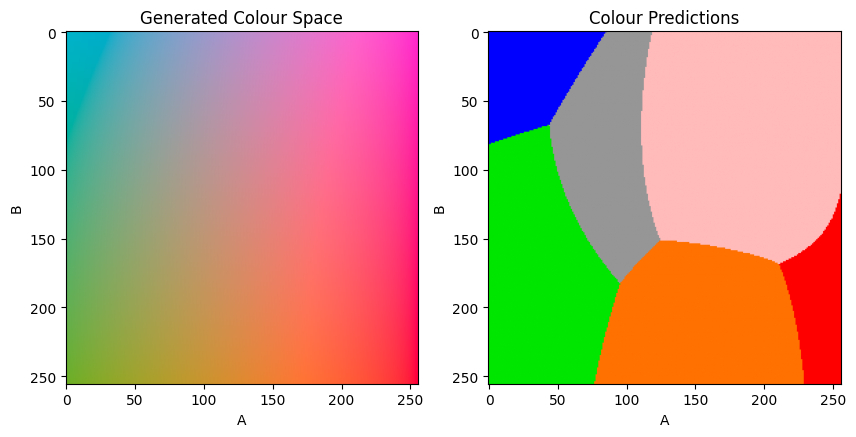

In [10]:
# Generate a subset of L*A*B colour space
    # L: luminescence (0 to 100)
    # A: greenness to redness (-128 to +127)
    # B: blueness to yellowness (-128 to +127)

plt.figure(figsize=(10, 5))
resolution = 256
wid, hei = resolution, resolution
luminescence = 65
a_low = np.random.randint(-128, 0)
a_high = np.random.randint(0, 127)
b_low = np.random.randint(-128, 0)
b_high = np.random.randint(0, 127)

ag = np.linspace(a_low, a_high, wid)
bg = np.linspace(b_low, b_high, hei)

aa, bb = np.meshgrid(ag, bg)
ll = luminescence * np.ones((hei, wid))
lab_grid = np.stack([ll, aa, bb], axis=2)
X_grid = lab2rgb(lab_grid) # convert l*a*b values to rgb

# generate RGB gradient and plot
plot_generated(wid, hei, a_low, a_high, b_low, b_high, X_grid)

# split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

# build model_rgb to predict labels (y) from rgb components (X)
model_rgb = GaussianNB()
model_rgb.fit(X_train, y_train)
print(model_rgb.score(X_valid,y_valid))

# predict pixels and plot
plot_predicted(wid, hei, a_low, a_high, b_low, b_high, X_grid, model_rgb)

plt.show()